In [1]:
# installed libraries
# +----------------------------------------------------------------------------+
import os
import sys
# import glob
import matplotlib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ipywidgets import interact
# from dataclasses import dataclass

# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# local modules
# +----------------------------------------------------------------------------+    
from plotconf import matsettings
from magscales.magscales import Richter1958
from miscmeta.sta.uustacors import UUSJ

# ipython magick
# +----------------------------------------------------------------------------+
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Explore a catalog of p-p WA amplitudes
<p>This notebook is intended to explore a catalog of amplitudes pulled by Ben Baker (UUSS) to learn the unique properties of a catalog.</p>

In [22]:
# catalog parsers 
# +----------------------------------------------------------------------------+
def convert_channels(df: pd.DataFrame) -> None:
    """
    """
    comp_map = {"1": "N", "2": "E"}
    df['channel'] = df["channel"].apply(lambda x: x[:-1] + comp_map[x[-1]] if x[-1] in ["1", "2"] else x)

def convert_cm_to_mm(df:pd.DataFrame) -> None:
    """
    Multiply any row amplitude entry corresponding to cm by 10
    to get mm. Then convert the cm entry to mm

    Returns: 
        None
    """
    df.loc[df["units"] == "cm" , "amplitude"] *= 10
    df.loc[df["units"] == "cm", "units"] = "mm"

def epoch_to_datetime(df):
    df["origin_time"] = pd.to_datetime(df["origin_time"], unit='s')

def clean_cat(df: pd.DataFrame, *funcs):

    for clean_fun in funcs: 
        clean_fun(df)

def load_baker_catalog(path, region=None):
    """
    Convenience function to load Ben Baker's UUSS Wood-Anderson amplitude catalog 
    for the Utah and Yellowstone regions. It was pulled from the AQMS database.
    This function also does a little cleaning to make it more compatible with what 
    my inversion code expects.
    """
    df = pd.read_csv(path, dtype={"location": str})
    # if region == 'Yellowstone':
    #     YS_BOUNDS = []
    clean_cat(df, epoch_to_datetime, convert_cm_to_mm, convert_channels)

    return df

# load catalog(s)    
# +----------------------------------------------------------------------------+
baker_cat_path = '../catalogs/amplitudes/ML-CAT-BB-UUSS-2021.csv'

cat = load_baker_catalog(baker_cat_path)


In [31]:
print(cat.channel.unique())

E = cat[cat["channel"].str.endswith("E")].rename(columns={"amplitude": "AmpE", "snr": "snrE"})
N = cat[cat["channel"].str.endswith("N")].rename(columns={"amplitude": "AmpN",  "snr": "snrN"})[["evid", "AmpN", "snrN"]]
EN = pd.merge(E, N, on='evid', how='inner')
EN

['HHE' 'HHN' 'BHN' 'BHE' 'ENE' 'ENN']


,evid,network,station,channel,location,pick_time,magnitude,AmpE,units,weight,...,event_lat,event_lon,event_depth,origin_time,event_magnitude,event_magnitude_type,etype,rflag,AmpN,snrN
0,60000045,UU,KNB,HHE,01,1.350389e+09,1.97,3.721184,mm,1,...,37.097667,-112.928167,18.27,2012-10-16 11:55:12.679999232,2.19,l,le,F,2.009185,6.946954
1,60000045,UU,KNB,HHE,01,1.350389e+09,1.97,3.721184,mm,1,...,37.097667,-112.928167,18.27,2012-10-16 11:55:12.679999232,2.19,l,le,F,6.138329,11.710181
2,60000045,UU,KNB,HHE,01,1.350389e+09,1.97,3.721184,mm,1,...,37.097667,-112.928167,18.27,2012-10-16 11:55:12.679999232,2.19,l,le,F,0.208046,3.263045
3,60000045,UU,LCMT,HHE,01,1.350389e+09,2.40,4.317676,mm,1,...,37.097667,-112.928167,18.27,2012-10-16 11:55:12.679999232,2.19,l,le,F,2.009185,6.946954
4,60000045,UU,LCMT,HHE,01,1.350389e+09,2.40,4.317676,mm,1,...,37.097667,-112.928167,18.27,2012-10-16 11:55:12.679999232,2.19,l,le,F,6.138329,11.710181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441172,60387327,UU,CTU,HHE,01,1.589737e+09,1.29,0.429827,mm,1,...,40.722500,-112.025167,9.22,2020-05-17 17:29:52.239998208,1.43,l,le,F,0.221168,4.442477
441173,60387327,UU,TCU,HHE,01,1.589737e+09,1.35,0.282778,mm,1,...,40.722500,-112.025167,9.22,2020-05-17 17:29:52.239998208,1.43,l,le,F,2.948581,47.436550
441174,60387327,UU,TCU,HHE,01,1.589737e+09,1.35,0.282778,mm,1,...,40.722500,-112.025167,9.22,2020-05-17 17:29:52.239998208,1.43,l,le,F,0.353304,8.133160
441175,60387327,UU,TCU,HHE,01,1.589737e+09,1.35,0.282778,mm,1,...,40.722500,-112.025167,9.22,2020-05-17 17:29:52.239998208,1.43,l,le,F,0.221168,4.442477


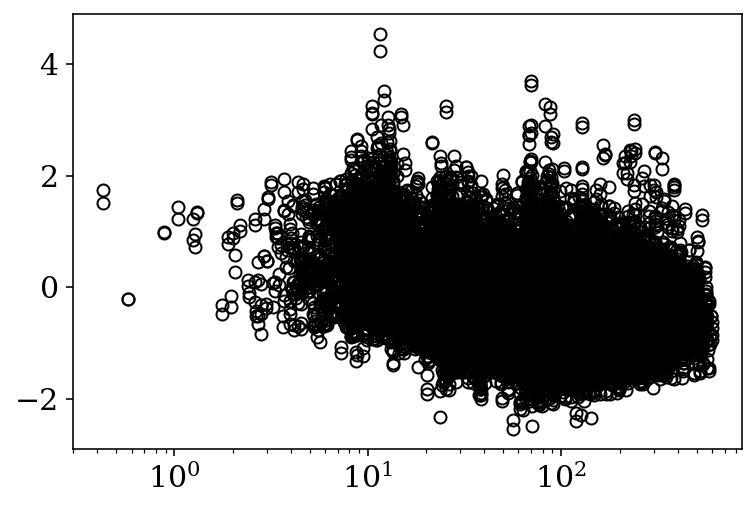

In [3]:

plt.semilogx(cat['source_receiver_distance'], np.log10(cat['amplitude']), 'ko', mfc='none')